In [33]:
#importing libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#import both files

In [2]:
chat = pd.read_csv("chat.csv")
stream = pd.read_csv("stream.csv")

In [3]:
chat.head()

,time,device_id,login,channel,country,player,game
0,2015-01-01 18:45:50,70e2b95b5ac0d4c227e46966658d16b3e044996e,5c2f5c1f19a7738e16ed0be551d865e8a8fce71d,jerry,BY,NaN,Dota 2
1,2015-01-01 01:16:57,f2b9065b55fd80d6aa653ce989b489f4ec5198be,0d77740e4fb5ce77d94f9f6c8ef1f762990d0344,elaine,HK,NaN,Devil May Cry 4: Special Edition
2,2015-01-01 16:22:10,d448ba963d7e1023dd1b0a40b95d4f6611750692,77ab14c1fb815e1c369ba0cf7d4c56b4fe489997,frank,GB,iphone_t,League of Legends
3,2015-01-01 03:58:13,8d6823dc52b400b50aebf269bf1f03a36d19eeaa,91cb88c0743761589273fc5e800e7743ece46494,frank,US,iphone_t,League of Legends
4,2015-01-01 11:47:35,16c1e39594d62358d27ae604ad43a071f0d86bc4,51a9234f83d656607cfd7f26690c12d2ffbce353,estelle,DE,NaN,Dota 2


In [34]:
stream.head()

,time,device_id,login,channel,country,player,game,stream_format,subscriber,hours,hour_of_day
0,2015-01-01 18:33:52,40ffc2fa6534cf760becbdbf5311e31ad069e46e,085c1eb7b587bfe654f0df7b4ba7f4fc4013636c,frank,US,iphone_t,League of Legends,NaN,NaN,18:33:52,18
1,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,False,23:35:33,23
2,2015-01-01 04:39:38,2f9c3f9ee1033b71a3819564243f20ef3bec0183,5b9a43e68f019185f55615d0b83019dee4b5d06f,frank,US,site,League of Legends,chunked,False,04:39:38,04
3,2015-01-01 11:15:30,0cda8226ba2583424c80c3c1c22c1256b080ad17,02c7797faa4d8a3ff4b0c14ee1764b6817b53d0b,estelle,CH,site,Dota 2,high,False,11:15:30,11
4,2015-01-01 11:28:19,e3288ca5e3153aa85e32f64cdd994b7666968dcf,b920c228acbcbebee26d9c79f6eb73b73a9480c7,morty,FR,site,Heroes of the Storm,medium,False,11:28:19,11


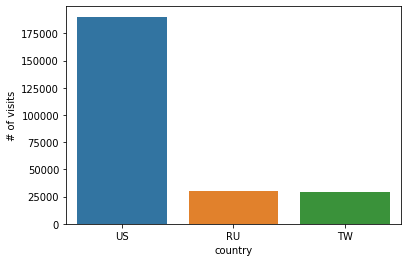

<Figure size 432x288 with 0 Axes>

In [23]:
# This function show the countries with the most activity inside of Twitch. 
# Within the parenthesis you enter the number of positions you want to observe, 
# otherwise you enter no number, it will show the top 10

def top_n_country_visits(top_n = None):
    if top_n == None:

        df = stream.groupby("country").device_id.count().reset_index()
        df=df.sort_values(by="device_id", ascending=False)
        df = df.iloc[:10]
        sns.barplot(data=df, x="country", y="device_id")
        plt.ylabel("# of visits")
        plt.show()
    else:
        df = stream.groupby("country").device_id.count().reset_index()
        df=df.sort_values(by="device_id", ascending=False)
        df = df.iloc[:top_n]
        sns.barplot(data=df, x="country", y="device_id")
        plt.ylabel("# of visits")
        plt.show()

top_n_country_visits(3)       
plt.clf()

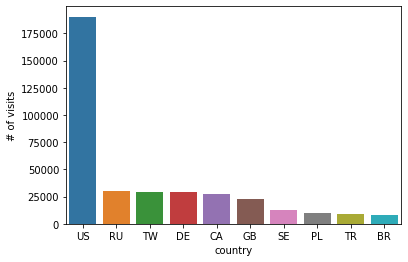

In [35]:
top_n_country_visits()  

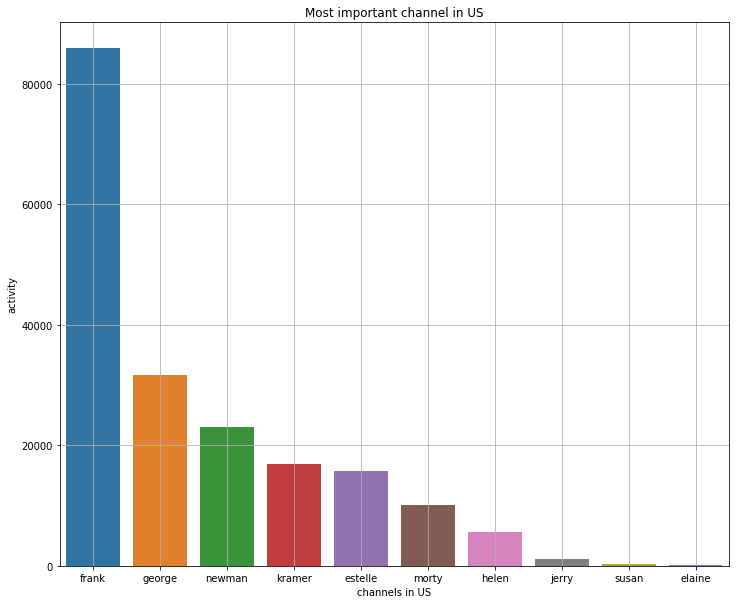

In [30]:
# This function allows us to observe the most important channels depending on the country we want
def most_important_channel_per_country(dataframe,country):
    df = dataframe.groupby([ "country", "channel"]).device_id.count().reset_index()
    df = df[df.country==country]
    df = df.sort_values(by="device_id", ascending =False)
    plt.figure(figsize=(12,10))
    sns.barplot(data=df, x="channel", y="device_id")
    plt.grid(True)
    plt.xlabel("channels in {}".format(country))
    plt.ylabel("activity")
    plt.title("Most important channel in {}".format(country))
    plt.show()
    
most_important_channel_per_country(stream,"US")
plt.clf()

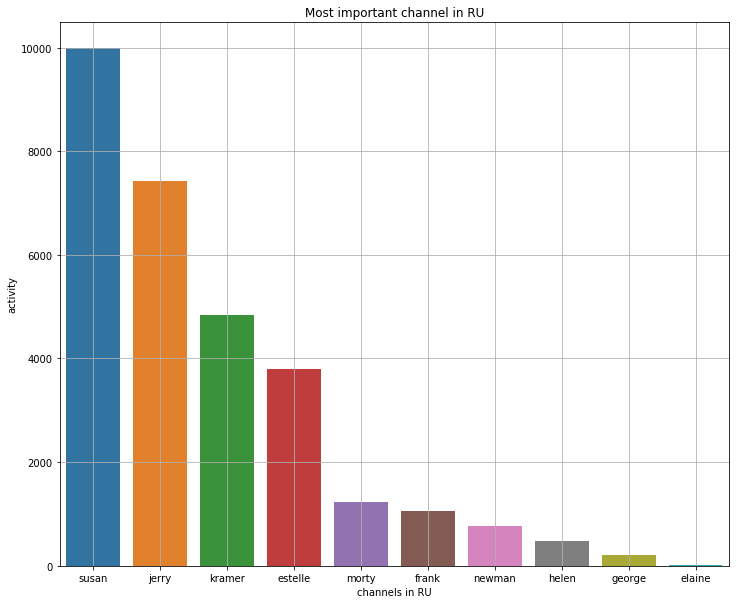

<Figure size 432x288 with 0 Axes>

In [31]:
# Most important channels in Russia
most_important_channel_per_country(stream,"RU")
plt.clf()

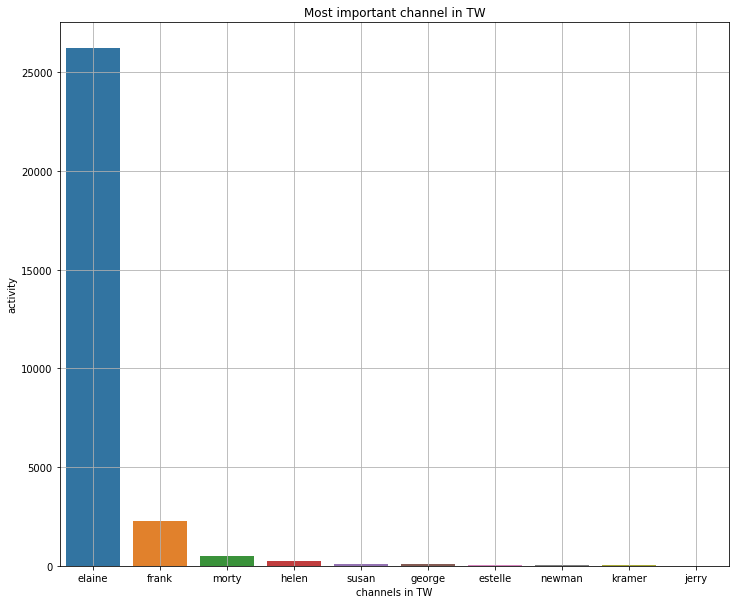

<Figure size 432x288 with 0 Axes>

In [32]:
# Most important channels in Taiwan
most_important_channel_per_country(stream,"TW")
plt.clf()

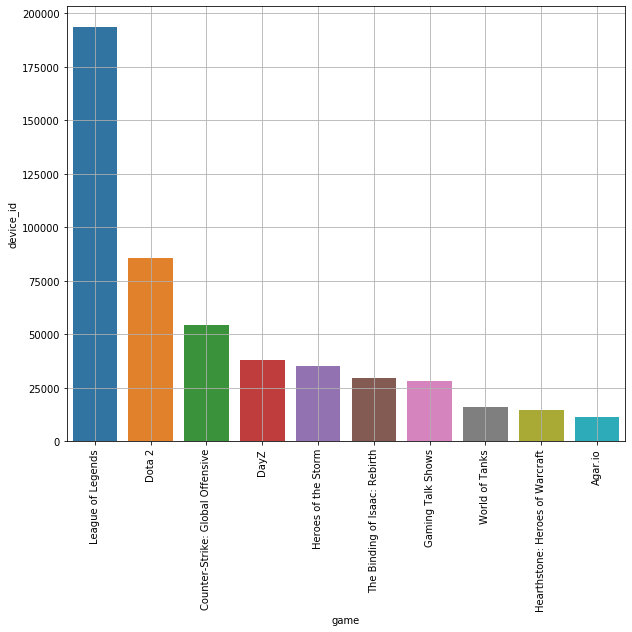

<Figure size 432x288 with 0 Axes>

In [7]:
#Most famous games on Twitch
df = stream.groupby("game").device_id.count().reset_index()
df = df.sort_values(by="device_id", ascending=False)
df = df.iloc[:10]
plt.figure(figsize=(10,8))
sns.barplot(data=df, x="game", y="device_id")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()
plt.clf()

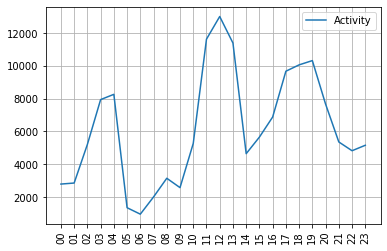

<Figure size 432x288 with 0 Axes>

In [8]:
# the function allow us to watch the activity de webpage during the day
def activity_per_hour(dataframe):
    dataframe["hours"] = dataframe.time.apply(lambda x : (x.split())[-1])
    dataframe["hour_of_day"]= dataframe.hours.apply(lambda x: (x.split(":"))[0])
    df = dataframe.groupby("hour_of_day").login.count().reset_index()
    plt.plot(df["hour_of_day"], df["login"], label="Activity")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.show()

activity_per_hour(chat)
plt.clf()
#In Chat Dataframe during 11 - 13 hours, we can watch the most amount of activity

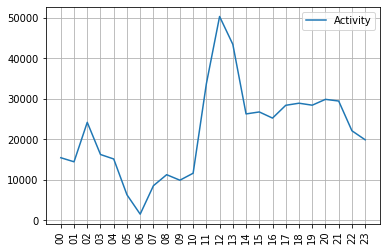

<Figure size 432x288 with 0 Axes>

In [9]:
activity_per_hour(stream)
plt.clf()
#at noon we can see the highest activity in the stream dataframe

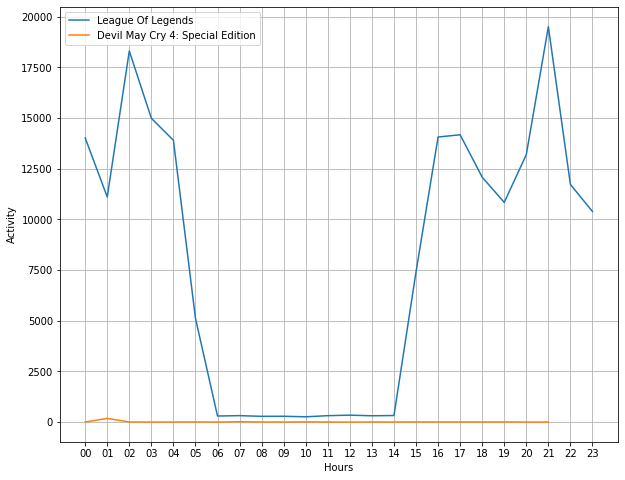

<Figure size 432x288 with 0 Axes>

In [10]:
# This function allows us to compare the activity of two different video games during different hours
def activity_difference_2_games(dataframe, game1,game2):
    dataframe["hours"] = dataframe.time.apply(lambda x : (x.split())[-1])
    dataframe["hour_of_day"]= dataframe.hours.apply(lambda x: (x.split(":"))[0])
    plt.figure(figsize=(10,8))
    df1 = dataframe[dataframe.game == game1]
    df2 = dataframe[dataframe.game == game2]
    df1 = df1.groupby("hour_of_day").login.count().reset_index()
    df2 = df2.groupby("hour_of_day").login.count().reset_index()
    plt.plot(df1["hour_of_day"], df1["login"], label=game1.title())
    plt.plot(df2["hour_of_day"], df2["login"], label =game2.title())
    plt.legend()
    plt.xlabel("hours".title())
    plt.ylabel("activity".title())
    plt.grid(True)
    plt.show()
    
activity_difference_2_games(stream, "League of Legends","Devil May Cry 4: Special Edition")
plt.clf()

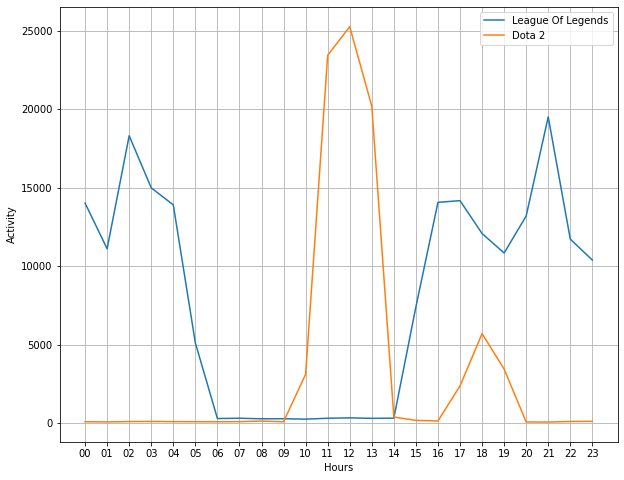

<Figure size 432x288 with 0 Axes>

In [11]:
# Comparig two videgames: League of Legends and Dota 2
activity_difference_2_games(stream, "League of Legends","Dota 2")
plt.clf()

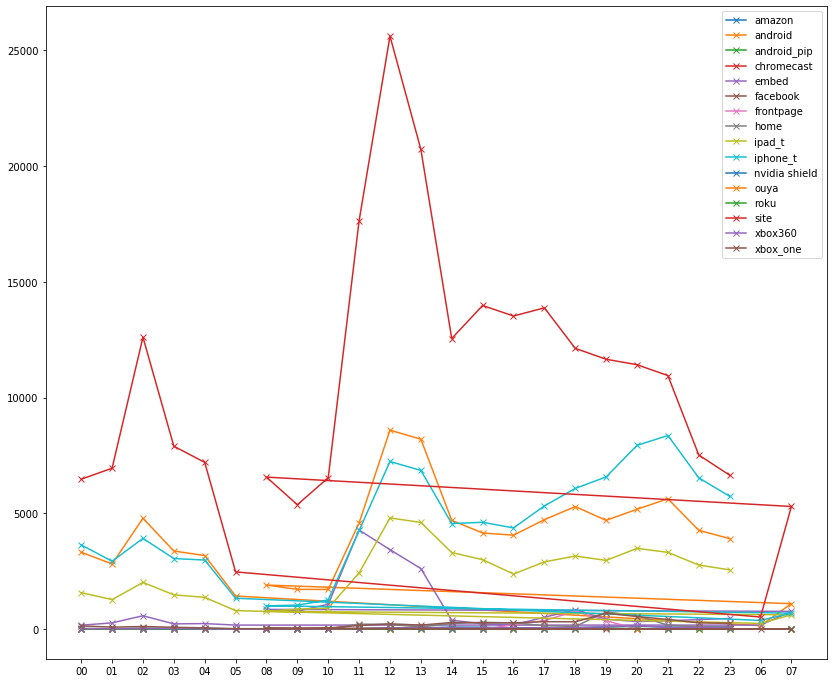

<Figure size 432x288 with 0 Axes>

In [12]:
# This function allow us to watch the activity the streamer: In this case site is the most popular streamer
def activity_per_streamer():
    stream["hours"] = stream.time.apply(lambda x : (x.split())[-1])
    stream["hour_of_day"]= stream.hours.apply(lambda x: (x.split(":"))[0])
    df = stream.groupby(["player", "hour_of_day"]).login.count().reset_index()
    ls = []
    for x in df["player"]:
        if not(x in ls):
            ls.append(x)
        else:
            continue
    plt.figure(figsize=(14,12))
    for x in ls:
        df1 = df[df.player == x]
        df1 = df1.sort_values(by="hour_of_day")
        plt.plot(df1["hour_of_day"], df1["login"], label= x, marker="x")
        plt.legend()

    plt.show()

activity_per_streamer()
plt.clf()

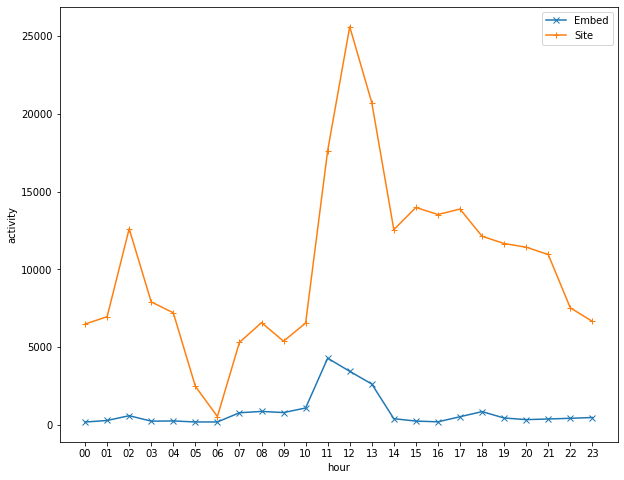

In [13]:
# this function allow us to compare 2 differents streamer, regardless of the dataframe
def activity_between_two_streamer(streamer1, streamer2):    
    stream["hours"] = stream.time.apply(lambda x : (x.split())[-1])
    stream["hour_of_day"]= stream.hours.apply(lambda x: (x.split(":"))[0])
    df = stream.groupby(["player", "hour_of_day"]).login.count().reset_index()
    df1 = df[df.player==streamer1]
    df2 = df[df.player==streamer2]
    plt.figure(figsize=(10,8))
    plt.plot(df1.hour_of_day, df1.login, label =streamer1.title(), marker="x")
    plt.plot(df2.hour_of_day, df2.login, label = streamer2.title(), marker="+")
    plt.legend()
    plt.xlabel("hour")
    plt.ylabel("activity")
    plt.show()

activity_between_two_streamer("embed", "site")

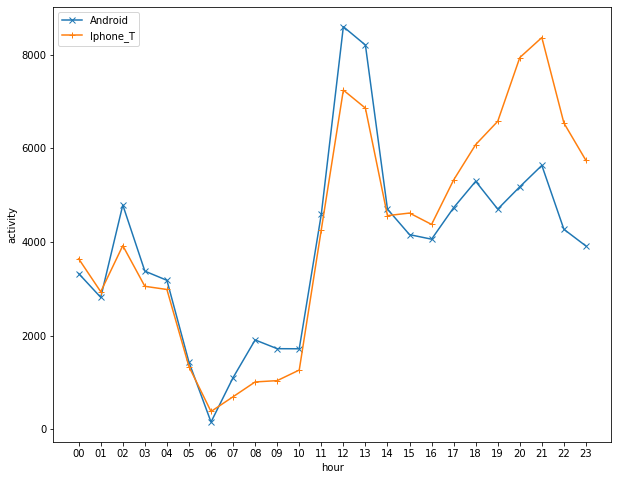

In [16]:
activity_between_two_streamer("android", "iphone_t")